# Sprint 10. Aplicabilidad de Web Scrapping

# 1. Descripción

**Web Scraping** es un Proceso de extracción de datos almacenados en la Web. Muchos proyectos de análisis de datos, macrodatos y aprendizaje automático requieren raspar sitios web para recopilar los datos con los que trabajará. El lenguaje de programación Python es muy utilizado en la comunidad de ciencia de datos, por lo que cuenta con un ecosistema de módulos y herramientas que puedes utilizar en tus propios proyectos.

<div class="alert alert-info alert-info"><b><h1>Objetivo</h1></b>
    
**Conocer las técnicas de web scraping y ordenar la información obtenida.**
</div>

<div class="alert alert-success alert-success"><b><h1>Actividades a realizar:</h1></b>

 **Ejercicio 1**: Realizar web scraping de dos de las tres páginas web propuestas utilizando BeautifulSoup primero y Selenium después. Utilizar las siguientes paginas webs : http://quotes.toscrape.com, https://www.bolsamadrid.es o - www.wikipedia.es.
 
 **Ejercicio 2** : Documentar en un Word tu conjunto de datos generado con la información que tienen los distintos archivos de Kaggle.
    
 **Ejercicio 3** : Seleccionar una página web que quieras y realizar web scraping mediante la librería Selenium primero y Scrapy después.
 
</div>

___


In [85]:
#import libraries
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from bs4 import BeautifulSoup
import requests 

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
import time

import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

#import librerias de frecuencias
from nltk.probability import FreqDist

#import librerias de pre-procesamiento y normalizacion
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from nltk.tag import pos_tag

#import librerias Sentiments
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from nltk.tokenize import RegexpTokenizer

import warnings
warnings.filterwarnings("ignore")

# 2. Aplicación de Web scrapping 

* **Ejercicio 1:** Realizar web scraping de dos páginas web propuestas utilizando BeautifulSoup primero y Selenium después.

El web scraping es un proceso mediante el cual se extraen datos y contenido de sitios web, es una forma eficiente de obtener información de varios sitios web de manera automatizada. Este proceso se realiza mediante el uso de software o scripts que analizan la estructura de una página web y extraen información relevante.

## 2.1 Pagina: Quotes

Se utilizará la pagina de https://quotes.toscrape.com/ para realizar realizar el webscrapping, Quotes to Scrape contiene una lista paginada de citas. 

Para el scrapping se tomará cada cita, y se irá a extraer el texto, el autor y la lista de etiquetas.

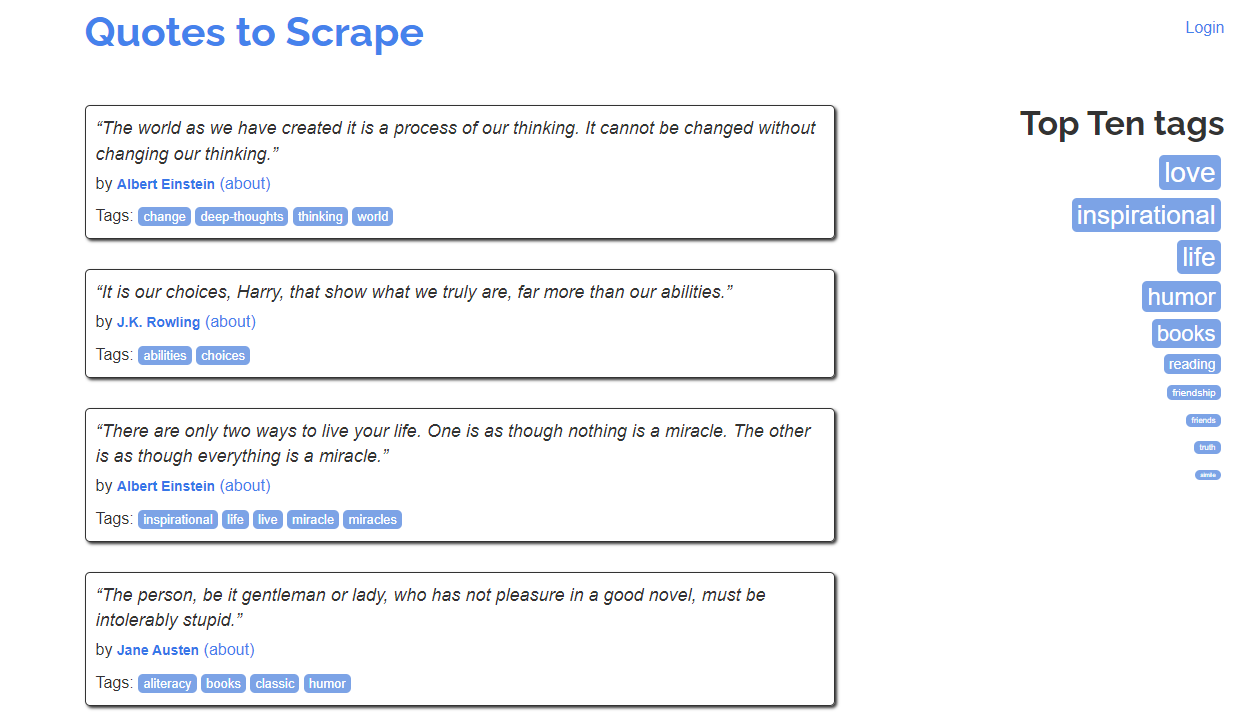

### 2.1.1 BeautifulSoup

Beautiful Soup es una biblioteca de Python que se utiliza para analizar y extraer información de documentos HTML y XML. Con Beautiful Soup, puede analizar un documento HTML/XML y navegar por la estructura del árbol para extraer información de interés. Por ejemplo, puede extraer el contenido de una etiqueta HTML específica, buscar todas las etiquetas que coincidan con un patrón determinado o navegar por el árbol del documento para encontrar etiquetas específicas.

La biblioteca Beautiful Soup está diseñada para trabajar con diferentes tipos de analizadores de documentos HTML/XML, lo que significa que puede trabajar con documentos que contienen errores, son inconsistentes o no están bien formados.

In [2]:
def scrape_page(soup, quotes):
    # retrieving all the quote <div> HTML element on the page
    quote_elements = soup.find_all('div', class_='quote')

    # iterating over the list of quote elements to extract the data of interest and store it in quotes
    for quote_element in quote_elements:
        # extracting the text of the quote
        text = quote_element.find('span', class_='text').text

        # extracting the author of the quote
        author = quote_element.find('small', class_='author').text

        # extracting the tag <a> HTML elements related to the quote
        tag_elements = quote_element.find('div', class_='tags').find_all('a', class_='tag')

        # storing the list of tag strings in a list using list comprehension
        tags = [tag_element.text for tag_element in tag_elements]

        # appending a dictionary containing the quote data in a new format in the quote list
        quote_dict = {
            'text': text,
            'author': author,
            'tags': ', '.join(tags)  # merging the tags into a "A, B, ..., Z" string
        }
        quotes.append(quote_dict)
        print(quote_dict)

In [3]:
# create an empty list to store the quotes
quotes = []

# loop over the pages
for page in range(1, 3):  # change the range to the desired page range
    # send a GET request to the website
    response = requests.get(f'https://quotes.toscrape.com/page/{page}/')

    # parse the HTML content using Beautiful Soup
    soup = BeautifulSoup(response.content, 'html.parser')

    # call the scrape_page() function to extract the quotes on the page
    scrape_page(soup, quotes)

{'text': '“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”', 'author': 'Albert Einstein', 'tags': 'change, deep-thoughts, thinking, world'}
{'text': '“It is our choices, Harry, that show what we truly are, far more than our abilities.”', 'author': 'J.K. Rowling', 'tags': 'abilities, choices'}
{'text': '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”', 'author': 'Albert Einstein', 'tags': 'inspirational, life, live, miracle, miracles'}
{'text': '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”', 'author': 'Jane Austen', 'tags': 'aliteracy, books, classic, humor'}
{'text': "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”", 'author': 'Marilyn Monroe', 'tags': 'be-yourself, inspirational'}
{'text': '“Try not to become a man

In [4]:
# reading  the "quotes.csv" file and creating it if not present
csv_file = open('quotes.csv', 'w', encoding='utf-8', newline='')

# initializing the writer object to insert data in the CSV file
writer = csv.writer(csv_file)

# writing the header of the CSV file
writer.writerow(['Text', 'Author', 'Tags'])

# writing each row of the CSV
for quote in quotes:
    writer.writerow(quote.values())

# terminating the operation and releasing the resources
csv_file.close()

### 2.1.2 Selenium

Selenium es una biblioteca de software libre y de código abierto para automatizar pruebas en aplicaciones web a través de un navegador web.

Con Selenium se puede simular las acciones que un usuario realiza en un sitio web como hacer clic en botones, introducir texto, navegar a diferentes páginas, interactuar con elementos de la página web y extraer datos de la misma.

Además, Selenium se puede utilizar para automatizar la interacción con el navegador web y la extracción de información de sitios web dinámicos que utilizan tecnologías como JavaScript, AJAX y jQuery.

Selenium puede trabajar con varios lenguajes de programación, incluyendo Python, Java, C#, JavaScript y Ruby.

In [60]:
def scrape_quotes(num_pages):
    # se inicia una instancia del navegador
    driver = webdriver.Chrome("C:\Program Files (x86)\chromedriver.exe")

    # se navega a la página web
    driver.get('https://quotes.toscrape.com/')

    # se busca y se extraen las citas, los autores y los tags
    quotes = []
    for i in range(num_pages):
        quote_elements = driver.find_elements(By.CLASS_NAME,'quote')
        for quote_element in quote_elements:
            text = quote_element.find_element(By.CLASS_NAME, "text").text
            author = quote_element.find_element(By.CLASS_NAME, "author").text
            tags = [tag.text for tag in quote_element.find_elements(By.CLASS_NAME,'tag')]

            quotes.append({'text': text, 'author': author, 'tags': tags})

        try:
            # se busca y se hace clic en el botón "Next"
            next_button = driver.find_element('xpath','//li[@class="next"]/a')
            next_button.click()
            time.sleep(2)
        except NoSuchElementException:
            break

    # se cierra la instancia del navegador
    driver.quit()

    return quotes

In [6]:
quotes = scrape_quotes(3)
print(quotes)

[{'text': '“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”', 'author': 'Albert Einstein', 'tags': ['change', 'deep-thoughts', 'thinking', 'world']}, {'text': '“It is our choices, Harry, that show what we truly are, far more than our abilities.”', 'author': 'J.K. Rowling', 'tags': ['abilities', 'choices']}, {'text': '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”', 'author': 'Albert Einstein', 'tags': ['inspirational', 'life', 'live', 'miracle', 'miracles']}, {'text': '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”', 'author': 'Jane Austen', 'tags': ['aliteracy', 'books', 'classic', 'humor']}, {'text': "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”", 'author': 'Marilyn Monroe', 'tags': ['be-yourself', 'inspirationa

Con ambas librerias se obtienen los valores solicitados, sin embargo  la principal diferencia entre Selenium y Beautiful Soup es que Selenium se utiliza para interactuar con sitios web, mientras que Beautiful Soup se utiliza para analizar el contenido de una página web y extraer información específica. Por lo tanto, si su objetivo es interactuar con un sitio web, debe utilizar Selenium. Si su objetivo es analizar y extraer datos de una página web, entonces Beautiful Soup es la mejor opción.

### 2.3 Análisis de sentimiento 

Para el análisis de sentimiento se utilizaran los resultados obtenidos del scrapping con BeautifullSoup. 

* **Convertir el diccionario en un texto**

In [67]:
#convertir el diccionario en texto
text = ''
for quote in quotes:
    text += quote['text'] + ' - ' + quote['author'] + ' ' + ', '.join(quote['tags']) + ','
text

"“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.” - Albert Einstein change, deep-thoughts, thinking, world,“It is our choices, Harry, that show what we truly are, far more than our abilities.” - J.K. Rowling abilities, choices,“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.” - Albert Einstein inspirational, life, live, miracle, miracles,“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.” - Jane Austen aliteracy, books, classic, humor,“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.” - Marilyn Monroe be-yourself, inspirational,“Try not to become a man of success. Rather become a man of value.” - Albert Einstein adulthood, success, value,“It is better to be hated for what you are than to be loved for what you are not.” - André 

In [68]:
# convert to lower words
lower_text = text.lower()
print(lower_text)

“the world as we have created it is a process of our thinking. it cannot be changed without changing our thinking.” - albert einstein change, deep-thoughts, thinking, world,“it is our choices, harry, that show what we truly are, far more than our abilities.” - j.k. rowling abilities, choices,“there are only two ways to live your life. one is as though nothing is a miracle. the other is as though everything is a miracle.” - albert einstein inspirational, life, live, miracle, miracles,“the person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.” - jane austen aliteracy, books, classic, humor,“imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.” - marilyn monroe be-yourself, inspirational,“try not to become a man of success. rather become a man of value.” - albert einstein adulthood, success, value,“it is better to be hated for what you are than to be loved for what you are not.” - andré g

* **Tokenizar el texto**

In [69]:
tokenized_text = sent_tokenize(lower_text)
print(tokenized_text)

['“the world as we have created it is a process of our thinking.', 'it cannot be changed without changing our thinking.” - albert einstein change, deep-thoughts, thinking, world,“it is our choices, harry, that show what we truly are, far more than our abilities.” - j.k. rowling abilities, choices,“there are only two ways to live your life.', 'one is as though nothing is a miracle.', "the other is as though everything is a miracle.” - albert einstein inspirational, life, live, miracle, miracles,“the person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.” - jane austen aliteracy, books, classic, humor,“imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.” - marilyn monroe be-yourself, inspirational,“try not to become a man of success.", 'rather become a man of value.” - albert einstein adulthood, success, value,“it is better to be hated for what you are than to be loved for what you are n

In [70]:
# Tokenizacion de las palabras
tokenized_word = word_tokenize(lower_text)
print(tokenized_word)

['“', 'the', 'world', 'as', 'we', 'have', 'created', 'it', 'is', 'a', 'process', 'of', 'our', 'thinking', '.', 'it', 'can', 'not', 'be', 'changed', 'without', 'changing', 'our', 'thinking.', '”', '-', 'albert', 'einstein', 'change', ',', 'deep-thoughts', ',', 'thinking', ',', 'world', ',', '“', 'it', 'is', 'our', 'choices', ',', 'harry', ',', 'that', 'show', 'what', 'we', 'truly', 'are', ',', 'far', 'more', 'than', 'our', 'abilities.', '”', '-', 'j.k.', 'rowling', 'abilities', ',', 'choices', ',', '“', 'there', 'are', 'only', 'two', 'ways', 'to', 'live', 'your', 'life', '.', 'one', 'is', 'as', 'though', 'nothing', 'is', 'a', 'miracle', '.', 'the', 'other', 'is', 'as', 'though', 'everything', 'is', 'a', 'miracle.', '”', '-', 'albert', 'einstein', 'inspirational', ',', 'life', ',', 'live', ',', 'miracle', ',', 'miracles', ',', '“', 'the', 'person', ',', 'be', 'it', 'gentleman', 'or', 'lady', ',', 'who', 'has', 'not', 'pleasure', 'in', 'a', 'good', 'novel', ',', 'must', 'be', 'intolerably

 * **Limpieza de los datos**

In [71]:
only_words_tokenized = [word for word in tokenized_word if word.isalpha()]
print(only_words_tokenized)

['the', 'world', 'as', 'we', 'have', 'created', 'it', 'is', 'a', 'process', 'of', 'our', 'thinking', 'it', 'can', 'not', 'be', 'changed', 'without', 'changing', 'our', 'albert', 'einstein', 'change', 'thinking', 'world', 'it', 'is', 'our', 'choices', 'harry', 'that', 'show', 'what', 'we', 'truly', 'are', 'far', 'more', 'than', 'our', 'rowling', 'abilities', 'choices', 'there', 'are', 'only', 'two', 'ways', 'to', 'live', 'your', 'life', 'one', 'is', 'as', 'though', 'nothing', 'is', 'a', 'miracle', 'the', 'other', 'is', 'as', 'though', 'everything', 'is', 'a', 'albert', 'einstein', 'inspirational', 'life', 'live', 'miracle', 'miracles', 'the', 'person', 'be', 'it', 'gentleman', 'or', 'lady', 'who', 'has', 'not', 'pleasure', 'in', 'a', 'good', 'novel', 'must', 'be', 'intolerably', 'jane', 'austen', 'aliteracy', 'books', 'classic', 'humor', 'imperfection', 'is', 'beauty', 'madness', 'is', 'genius', 'and', 'it', 'better', 'to', 'be', 'absolutely', 'ridiculous', 'than', 'absolutely', 'marily

* **Remover los stopwords**

In [72]:
# Stopwords in English
stop_words = set(stopwords.words("english"))
print(stop_words)

{'is', "shouldn't", 'with', 'no', 'than', 'and', 'hasn', 'there', 'ourselves', 'isn', "it's", 'the', 'it', 'couldn', 'ours', 'in', 'she', 'can', 'm', 'they', 'over', 'her', 'were', 'down', 'if', 'out', "you'll", 've', 'by', 'or', 'him', 'ain', 'too', 'their', "haven't", 'o', 'now', 'did', "hadn't", 'which', 'them', 'until', 'what', "you'd", 'own', 'my', 'whom', 'while', 'same', 'll', 'under', 'themselves', "you've", 'both', 'against', 'other', 'any', 'once', 'again', 'theirs', 'be', 'haven', 'this', 'myself', "don't", 's', 'few', 'needn', 'wasn', 'won', 'who', 'up', 'hers', 'have', 'wouldn', 'so', 'didn', 'more', 'your', 'was', 'y', "weren't", 'yourselves', 'had', 'each', 'through', 'at', 'herself', 'weren', 'am', 'then', 'just', "you're", 'before', 're', "needn't", 'being', 'such', "isn't", 'you', 'mustn', 'not', 'where', 'how', 'his', 'doing', 'about', 'a', "wasn't", "mightn't", "shan't", 'below', "didn't", "won't", 'are', 'of', 'most', 'been', 'between', 'will', 'off', 'why', 'here'

In [73]:
# we are removing all stop words either in uppercase and in lowercase 
filtered_text = [w for w in only_words_tokenized if w.lower() not in stop_words]
print(filtered_text)

['world', 'created', 'process', 'thinking', 'changed', 'without', 'changing', 'albert', 'einstein', 'change', 'thinking', 'world', 'choices', 'harry', 'show', 'truly', 'far', 'rowling', 'abilities', 'choices', 'two', 'ways', 'live', 'life', 'one', 'though', 'nothing', 'miracle', 'though', 'everything', 'albert', 'einstein', 'inspirational', 'life', 'live', 'miracle', 'miracles', 'person', 'gentleman', 'lady', 'pleasure', 'good', 'novel', 'must', 'intolerably', 'jane', 'austen', 'aliteracy', 'books', 'classic', 'humor', 'imperfection', 'beauty', 'madness', 'genius', 'better', 'absolutely', 'ridiculous', 'absolutely', 'marilyn', 'monroe', 'inspirational', 'try', 'become', 'man', 'success', 'rather', 'become', 'man', 'albert', 'einstein', 'adulthood', 'success', 'value', 'better', 'hated', 'loved', 'andré', 'gide', 'life', 'love', 'failed', 'found', 'ways', 'wo', 'thomas', 'edison', 'edison', 'failure', 'inspirational', 'paraphrased', 'woman', 'like', 'tea', 'bag', 'never', 'know', 'stron

* **Normalización**

In [80]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    pos_tags = nltk.pos_tag(text)
    lemmatized_text = [lemmatizer.lemmatize(word, get_wordnet_pos(pos_tag)) for word, pos_tag in pos_tags]
    return lemmatized_text

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return 'a'
    elif pos_tag.startswith('V'):
        return 'v'
    elif pos_tag.startswith('N'):
        return 'n'
    elif pos_tag.startswith('R'):
        return 'r'
    else:
        return 'n'

In [81]:
lemmatized_word = lemmatize_text(filtered_text)

print(lemmatized_word)

['world', 'create', 'process', 'think', 'change', 'without', 'change', 'albert', 'einstein', 'change', 'think', 'world', 'choice', 'harry', 'show', 'truly', 'far', 'rowling', 'ability', 'choice', 'two', 'way', 'live', 'life', 'one', 'though', 'nothing', 'miracle', 'though', 'everything', 'albert', 'einstein', 'inspirational', 'life', 'live', 'miracle', 'miracle', 'person', 'gentleman', 'lady', 'pleasure', 'good', 'novel', 'must', 'intolerably', 'jane', 'austen', 'aliteracy', 'book', 'classic', 'humor', 'imperfection', 'beauty', 'madness', 'genius', 'well', 'absolutely', 'ridiculous', 'absolutely', 'marilyn', 'monroe', 'inspirational', 'try', 'become', 'man', 'success', 'rather', 'become', 'man', 'albert', 'einstein', 'adulthood', 'success', 'value', 'well', 'hat', 'loved', 'andré', 'gide', 'life', 'love', 'fail', 'find', 'way', 'wo', 'thomas', 'edison', 'edison', 'failure', 'inspirational', 'paraphrase', 'woman', 'like', 'tea', 'bag', 'never', 'know', 'strong', 'hot', 'eleanor', 'roose

* **Visualización del texto.**

In [86]:
from PIL import Image

#Función para transformar todas las imágenes PNG con fondo transparente a fondo blanco

def transform_white_backgroud(png_path):
    picture = Image.open(png_path).convert("RGBA")
    image = Image.new("RGB", picture.size, "WHITE")
    image.paste(picture, (0, 0), picture)

    plt.imshow(image)
    
    mask = np.array(image)
    
    return mask

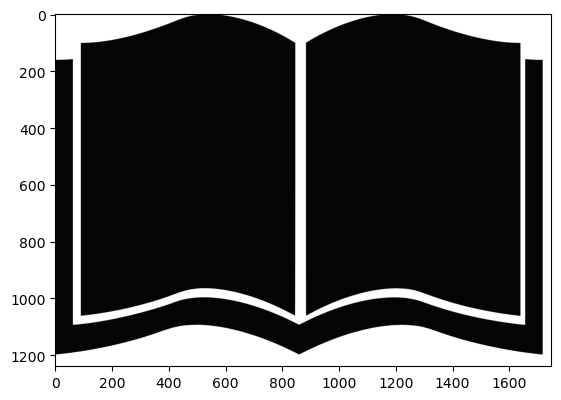

In [91]:
mask = transform_white_backgroud('libro.png')

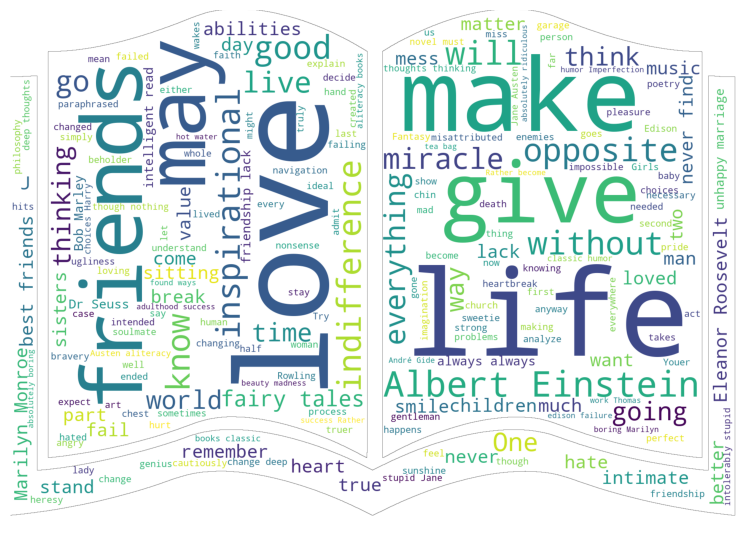

In [92]:
text2 = " ".join(lemmatized_word)
text2 = text.replace('"', '')

word_cloud = WordCloud(mask=mask, background_color='white', contour_width=1, contour_color='grey', max_words=200, 
                       min_font_size=5, collocation_threshold=10).generate(text2)

word_cloud.to_file('libro2.png') #Guardamos la imagen generada

plt.figure(figsize=(12,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

Como se puede observar, realizar un webscraping con beautifull Soup se puede analizar los sentiemiento del texto generado y asi poder identificar la esencia de lo que quiere mostrar esa página web. En el caso de aplicar nube de palabras,  esta ha permitido identificar rápidamente los temas más importantes del texto, así como las tendencias y los sentimientos que se esconden detrás de las palabras utilizadas.

En particular, hemos podido ver que algunas de las palabras más frecuentes en el texto incluyen "love", "friends", "life", "give", "miracle", "Albert Einstein" y "make". Estos términos nos permiten inferir que el texto podría tratar sobre temas como la amistad, el amor, la vida, el acto de dar, los milagros y las ideas de Albert Einstein.

En resumen, la nube de palabras es una herramienta muy útil para explorar la esencia de un texto y descubrir el verdadero significado detrás de las palabras utilizadas. En este caso, hemos podido obtener una vista previa visual del alma del texto, lo que nos ha permitido identificar rápidamente los temas y sentimientos principales.

## 2.2 Pagina: Wikipedia

El objetivo es usar BeautifulSoup para hacer un scraping a la pagina de wikipedia, sobre las noticias de la actualidad, adjunto una captura de pantalla de la página que se va a scrapear.

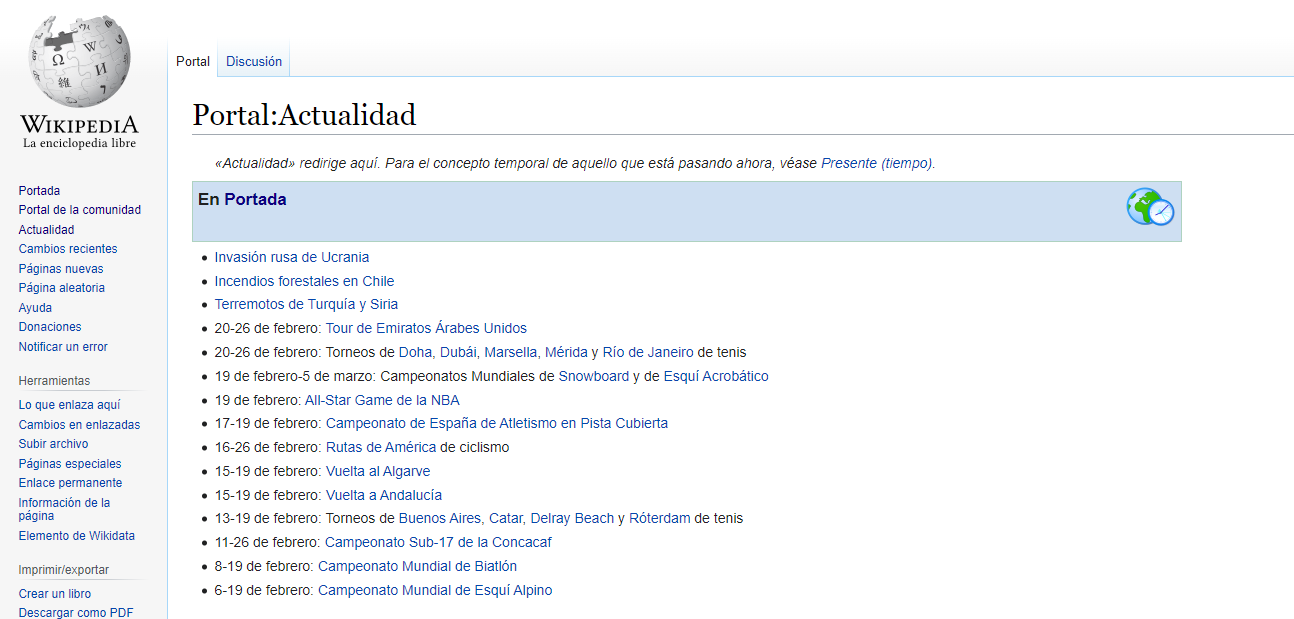

### 2.2.1 BeautifulSoup

In [7]:
# Hacemos la petición GET a la URL deseada
url = "https://es.wikipedia.org/wiki/Portal:Actualidad"
response = requests.get(url)

# Parseamos el HTML con BeautifulSoup
soup = BeautifulSoup(response.text, "html.parser")

# Encontramos todos los elementos <li> dentro del primer elemento <ul> de la página
ul = soup.find("ul")
li_items = ul.find_all("li")

# Iteramos sobre los elementos <li> y extraemos los datos que necesitamos
for li in li_items:
    # Obtenemos el título, la URL y el texto del elemento <a>
    link = li.find("a")
    title = link.get("title")
    url = "https://es.wikipedia.org" + link.get("href")
    text = link.text
    
    # Imprimimos los datos obtenidos
    print("Título: ", title)
    print("URL: ", url)
    print("Texto: ", text)
    print()


Título:  Invasión rusa de Ucrania (2022-presente)
URL:  https://es.wikipedia.org/wiki/Invasi%C3%B3n_rusa_de_Ucrania_(2022-presente)
Texto:  Invasión rusa de Ucrania

Título:  Incendios forestales en Chile de 2023
URL:  https://es.wikipedia.org/wiki/Incendios_forestales_en_Chile_de_2023
Texto:  Incendios forestales en Chile

Título:  Terremotos de Turquía y Siria de 2023
URL:  https://es.wikipedia.org/wiki/Terremotos_de_Turqu%C3%ADa_y_Siria_de_2023
Texto:  Terremotos de Turquía y Siria

Título:  UAE Tour 2023
URL:  https://es.wikipedia.org/wiki/UAE_Tour_2023
Texto:  Tour de Emiratos Árabes Unidos

Título:  Torneo de Doha 2023
URL:  https://es.wikipedia.org/wiki/Torneo_de_Doha_2023
Texto:  Doha

Título:  Campeonato Mundial de Snowboard de 2023
URL:  https://es.wikipedia.org/wiki/Campeonato_Mundial_de_Snowboard_de_2023
Texto:  Snowboard

Título:  All-Star Game de la NBA 2023
URL:  https://es.wikipedia.org/wiki/All-Star_Game_de_la_NBA_2023
Texto:  All-Star Game de la NBA

Título:  Campeona

### 2.2.2 Selenium

In [47]:
# Inicializar el driver de selenium
driver = webdriver.Chrome('./chromedriver')

# Cargar la página web
driver.get("https://es.wikipedia.org/wiki/Portal:Actualidad")

time.sleep(5)

ul = driver.find_element("xpath", '//*[@id="mw-content-text"]//ul')
data = []

# Buscar todos los enlaces dentro de la lista y mostrar su información
enlaces = ul.find_elements(By.TAG_NAME, "a")
for enlace in enlaces:
    title = enlace.get_attribute("title")
    url = "https://es.wikipedia.org" + enlace.get_attribute("href")
    text = enlace.text
    data.append([title, url])

    # Imprimir los datos obtenidos
    print("Título: ", title)
    print("URL: ", url)
    print("Texto: ", text)
    print()
# Cerrar el driver de selenium
driver.quit()

Título:  Invasión rusa de Ucrania (2022-presente)
URL:  https://es.wikipedia.orghttps://es.wikipedia.org/wiki/Invasi%C3%B3n_rusa_de_Ucrania_(2022-presente)
Texto:  Invasión rusa de Ucrania

Título:  Incendios forestales en Chile de 2023
URL:  https://es.wikipedia.orghttps://es.wikipedia.org/wiki/Incendios_forestales_en_Chile_de_2023
Texto:  Incendios forestales en Chile

Título:  Terremotos de Turquía y Siria de 2023
URL:  https://es.wikipedia.orghttps://es.wikipedia.org/wiki/Terremotos_de_Turqu%C3%ADa_y_Siria_de_2023
Texto:  Terremotos de Turquía y Siria

Título:  Copa Libertadores 2023
URL:  https://es.wikipedia.orghttps://es.wikipedia.org/wiki/Copa_Libertadores_2023
Texto:  Copa Libertadores

Título:  UAE Tour 2023
URL:  https://es.wikipedia.orghttps://es.wikipedia.org/wiki/UAE_Tour_2023
Texto:  Tour de Emiratos Árabes Unidos

Título:  Torneo de Doha 2023
URL:  https://es.wikipedia.orghttps://es.wikipedia.org/wiki/Torneo_de_Doha_2023
Texto:  Doha

Título:  Torneo de Dubái 2023
URL: 

In [54]:
# Convertir la lista en un dataframe de Pandas
news_df = pd.DataFrame(data, columns=['Título', 'URL'])

# Imprimir el dataframe
news_df.head(20)

,Título,URL
0,Invasión rusa de Ucrania (2022-presente),https://es.wikipedia.orghttps://es.wikipedia.o...
1,Incendios forestales en Chile de 2023,https://es.wikipedia.orghttps://es.wikipedia.o...
2,Terremotos de Turquía y Siria de 2023,https://es.wikipedia.orghttps://es.wikipedia.o...
3,Copa Libertadores 2023,https://es.wikipedia.orghttps://es.wikipedia.o...
4,UAE Tour 2023,https://es.wikipedia.orghttps://es.wikipedia.o...
5,Torneo de Doha 2023,https://es.wikipedia.orghttps://es.wikipedia.o...
6,Torneo de Dubái 2023,https://es.wikipedia.orghttps://es.wikipedia.o...
7,Torneo de Marsella 2023,https://es.wikipedia.orghttps://es.wikipedia.o...
8,Torneo de Mérida 2023,https://es.wikipedia.orghttps://es.wikipedia.o...
9,Torneo de Río de Janeiro 2023,https://es.wikipedia.orghttps://es.wikipedia.o...


* **Informaación del dataframe 

In [55]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Título  24 non-null     object
 1   URL     24 non-null     object
dtypes: object(2)
memory usage: 512.0+ bytes


# 3. Ejercicio 2 : Documentar el conjunto de datos generado.

* **Ejercicio 2 :** Documentar en un Word tu conjunto de datos generado con la información que tienen los distintos archivos de Kaggle.

### Reporte de las noticias actuales

Se generará un reporte de las noticias actuales generados en la practica anterior. Se tomará como modelo un ejemplo de kaggle, de acuerdo al siguiente link: https://www.kaggle.com/datasets/vivovinco/20212022-football-team-stats

### Acerca del conjunto de datos:

### Contexto

Este conjunto de datos contiene estadísticas de las noticias actuales del mes de febrero 2023. 

Las cuales estan listadas en el siguiente link: https://es.wikipedia.org/wiki/Portal:Actualidad. Los datos fueron recogidos el dia 20/02/2023.

### Contenido

El dataset contiene los siguientes registros:

* 24 filas y 2 columnas

La descripción de las columnas se enumera a continuación:

* **Titulo**: contiene los registros de los titulos de las noticias. 
* **Link**: El link en donde se puede encontrar información de la noticia.

### Agradecimientos

Datos extraídos de: https://es.wikipedia.org/wiki/Portal:Actualidad

### Referencias

* https://www.selenium.dev/documentation/webdriver/getting_started/first_script/
* https://realpython.com/modern-web-automation-with-python-and-selenium/
* https://www.datacamp.com/tutorial/web-scraping-python-nlp
* https://www.freecodecamp.org/news/scraping-wikipedia-articles-with-python/
* https://towardsdatascience.com/step-by-step-tutorial-web-scraping-wikipedia-with-beautifulsoup-48d7f2dfa52d

# 4. Conclusiones:

* Para realizar web scraping es necesario tener conocimientos básicos de HTML.
* Las bibliotecas que se utilizaron son herramientas poderosas que permiten obtener datos de la web.
* Aunque tanto la biblioteca Selenium como Beautiful Soup nos brindan resultados similares, personalmente prefiero usar Beautiful Soup debido a que la encontré más sencilla y amigable para el usuario.